In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns
pd.set_option('display.max_column',None)

In [151]:
data=pd.read_csv('Car_sales.csv')

In [152]:
data.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [153]:
data.shape

(157, 16)

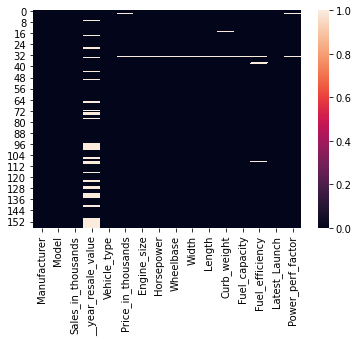

In [154]:
sns.heatmap(data.isnull())

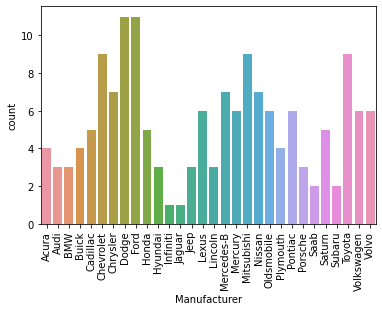

In [155]:
sns.countplot(data['Manufacturer'])
pl.xticks(range(30),np.unique(data['Manufacturer']),rotation=90)
pl.show()

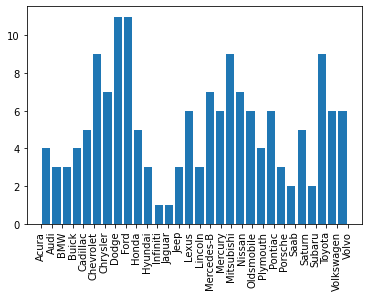

In [156]:
pl.hist(data['Manufacturer'],bins=30,rwidth=0.8)
pl.xticks(range(30),np.unique(data['Manufacturer']),rotation=90)
pl.show()

In [157]:
accura=data[data['Manufacturer']=='Acura']

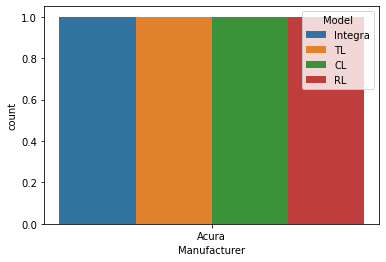

In [158]:
sns.countplot(accura['Manufacturer'],hue=accura['Model'])

In [159]:
data1=data.copy()

In [160]:
data1.drop_duplicates()
data1.drop('Latest_Launch',axis=1,inplace=True)

In [161]:
data1.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Power_perf_factor       2
dtype: int64

In [163]:
categorical_variables=[columns for columns in data1.columns if data1[columns].dtypes=='O']
categorical_variables

['Manufacturer', 'Model', 'Vehicle_type']

In [181]:
continous_variables=[columns for columns in data1.columns if data1[columns].dtypes=='float64']
continous_variables

['Sales_in_thousands',
 '__year_resale_value',
 'Price_in_thousands',
 'Engine_size',
 'Horsepower',
 'Wheelbase',
 'Width',
 'Length',
 'Curb_weight',
 'Fuel_capacity',
 'Fuel_efficiency',
 'Power_perf_factor']

In [184]:
# discrete_variables=[columns for columns in data1.columns if data[columns].dtypes!='O' and len(np.unique(data1[columns])<30)]
# discrete_variables

C:\Users\rissu\anaconda3\envs\Flask_app\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


['Sales_in_thousands',
 '__year_resale_value',
 'Price_in_thousands',
 'Engine_size',
 'Horsepower',
 'Wheelbase',
 'Width',
 'Length',
 'Curb_weight',
 'Fuel_capacity',
 'Fuel_efficiency',
 'Power_perf_factor']

In [185]:
len(categorical_variables)+len(continous_variables)

15

In [186]:
data2=data1.copy()

In [190]:
for columns in continous_variables:
    data2[columns].fillna(data2[columns].mean(),inplace=True)

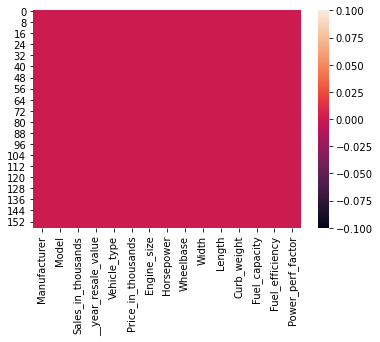

In [191]:
sns.heatmap(data2.isnull())

In [192]:
data2

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,Acura,Integra,16.919,16.360000,Passenger,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,Acura,TL,39.384,19.875000,Passenger,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,Acura,CL,14.114,18.225000,Passenger,27.390755,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,77.043591
3,Acura,RL,8.588,29.725000,Passenger,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,Audi,A4,20.397,22.255000,Passenger,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,18.072975,Passenger,24.400000,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,66.498812
153,Volvo,S70,15.245,18.072975,Passenger,27.500000,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,70.654495
154,Volvo,V70,17.531,18.072975,Passenger,28.800000,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,71.155978
155,Volvo,C70,3.493,18.072975,Passenger,45.500000,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,101.623357


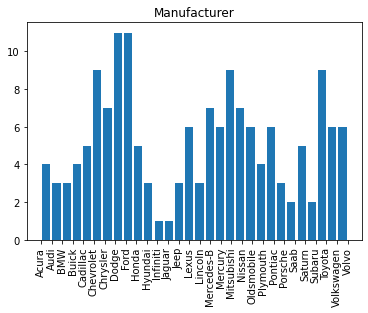

30


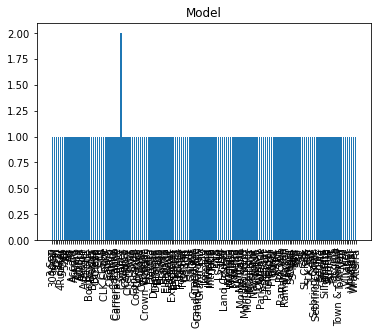

156


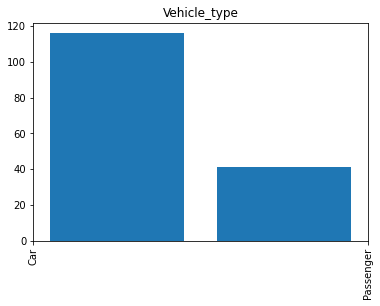

2


In [218]:
for columns in categorical_variables:
    length=(np.unique(data2[columns])).size
    pl.hist(data2[columns],bins=length,rwidth=0.8)
    pl.xticks(range(length),np.unique(data2[columns]),rotation=90)
    pl.title(columns)
    pl.show()
    print(length)